# Scikit-Learn wine dataset

Scikit-Learn comes with various standard datasets that can be used for practice (iris, digits, etc). One of these datasets contains information about different Italian wines.

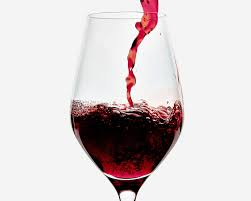

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Loading a dataset
The dataset is in the `data/` folder

In [2]:
import pandas as pd
wine = pd.read_csv('../data/wine.csv')
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Exercise: Using Pandas for Machine Learning projects

Pandas is a great tool to use in combination with *Scikit-Learn* to organize, inspect and work in other ways with your data. Here we will revisit some of the Pandas tools in application to this ML project.

Use your current knowledge of Pandas library with the provided `wine_df` to answer the following analytical questions.

Could any of them be *better* answered with Machine Learning?

1. how many rows and columns are present in the data?
2. which data types are used by each column?
3. verify that there are no missing values
4. rename 'od280/od315_of_diluted_wines' into something more meaningful
5. how many wines are present of each class?
6. what is the median color intensity for class 0?
7. Show a box-plot for colour intensity


In [3]:
#1
wine.shape

(178, 14)

In [4]:
#2
wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int64
dtype: object

In [5]:
# 2
wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [6]:
# 2 & 3
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [7]:
#4
wine.rename(columns={'od280/od315_of_diluted_wines':'protein_content'}, inplace=True)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,protein_content,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
#5
wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [9]:
#6
(
    wine
    .groupby('class')
    .median()['color_intensity']
)

class
0    5.40
1    2.90
2    7.55
Name: color_intensity, dtype: float64

<AxesSubplot:>

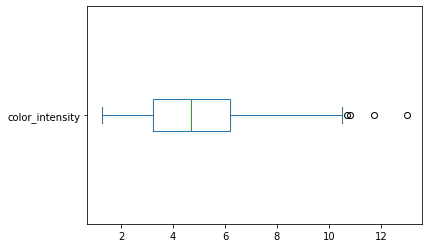

In [10]:
#7
(
    wine['color_intensity']
    .plot(kind='box', vert=False)
)


## Preparing the data for Sklearn
Before a Scikit-learn model is trained, a dataframe is commonly split into an n-dimensional vector of features *X* and a 1-dimensional target vector _y_


In [11]:
y = wine['class']
X = wine.drop(['class'], axis=1)
print(X.shape, y.shape)

(178, 13) (178,)


### Train-test split

We then perform a train test split so that we can evaluate the model we have learnt.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111, stratify=y)

## Training a model

Using the structure you have seen previously, what is the best performance you can get on this dataset?

- step 1: import a classifier
- step 2: instantiate the classifier
- step 3: fit the model on the training data
- step 4: make predictions on the test
- step 5: import some metrics and evaluate your predictions

What other interesting things can you do with your model?

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Uncomment the model that you want to try
model = DecisionTreeClassifier()
#model = RandomForestClassifier(n_estimators=1000)
# model = SVC()
#model = KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, classification_report
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(f'Model accuracy: {model.score(X_test, y_test)}')
print(report)

Model accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       0.94      0.81      0.87        21
           2       1.00      0.93      0.97        15

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.92      0.91      0.91        54



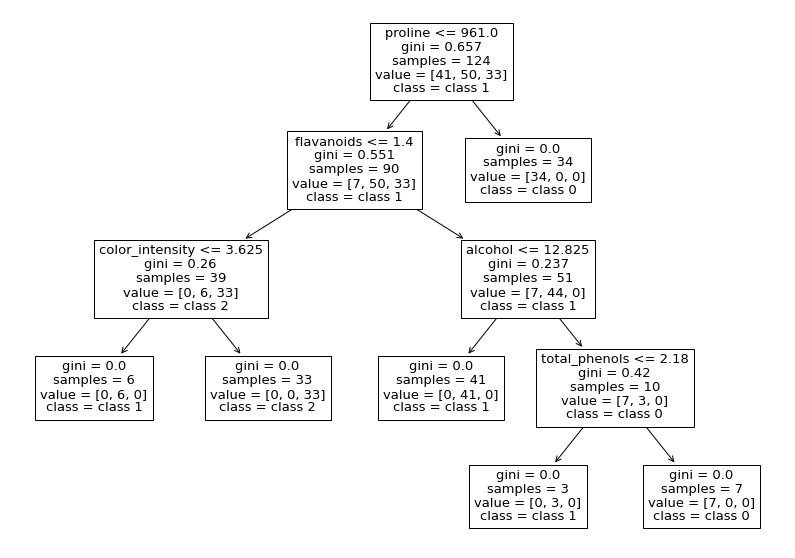

In [15]:
from sklearn.tree import plot_tree

labels = ['class 0', 'class 1', 'class 2']

fig, ax = plt.subplots(figsize=(14,10))

plot_tree(model, ax=ax, feature_names = X.columns, class_names=labels);